In [6]:
import os
import glob
import torch
import numpy as np

from sklearn import preprocessing, model_selection, metrics

import config
import dataset
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
image_files = glob.glob(os.path.join(config.DATA_DIR, "*.png"))
targets_orig = [x.split("/")[-1][:-4] for x in image_files]
targets = [[c for c in x] for x in targets_orig]
targets_flat = [c for clist in targets for c in clist]

lbl_enc = preprocessing.LabelEncoder()
lbl_enc.fit(targets_flat)
targets_enc = [lbl_enc.transform(x) for x in targets]
targets_enc = np.array(targets_enc)
targets_enc = targets_enc + 1

(
    train_imgs,
    test_imgs,
    train_targets,
    test_targets,
    _,
    test_targets_orig,
) = model_selection.train_test_split(
    image_files, targets_enc, targets_orig, test_size=0.1, random_state=42
)

train_dataset = dataset.ClassificationDataset(
    image_paths=train_imgs,
    targets=train_targets,
    resize=(config.IMAGE_HEIGHT, config.IMAGE_WIDTH),
)
train_loader = torch.utils.data.DataLoader(
    train_dataset,
    batch_size=config.BATCH_SIZE,
    num_workers=config.NUM_WORKERS,
    shuffle=True,
)
test_dataset = dataset.ClassificationDataset(
    image_paths=test_imgs,
    targets=test_targets,
    resize=(config.IMAGE_HEIGHT, config.IMAGE_WIDTH),
)
test_loader = torch.utils.data.DataLoader(
    test_dataset,
    batch_size=config.BATCH_SIZE,
    num_workers=config.NUM_WORKERS,
    shuffle=False,
)

In [22]:
npimg = train_dataset[2]["images"].numpy()

In [23]:
np.transpose(npimg, (1, 2, 0)).shape

(75, 300, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


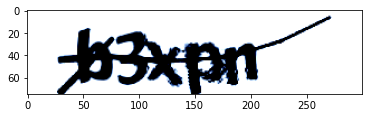

In [24]:
plt.imshow(np.transpose(npimg, (1, 2, 0)))